In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

## Plotting code for large sweep

In [ ]:
plt.style.use('style.mplstyle')
H = 8
D = 8
cmap = plt.get_cmap('hsv')
vals = [4., 2., 1., 0.5, 0.25]
param_list = []
for u in vals:
    for v in vals:
        param_list.append((u, v, H, D))
plt.style.use('style.mplstyle')
fig, ax = plt.subplots(figsize = (8, 7))
i = 0
for param in param_list:
    filename = 'sweep_alpha={}_beta={}_H={}_D={}.pkl'.format(param[0], param[1], param[2], param[3])
    # filename = 'sweep_alpha={}_beta={}_H={}_D=S.pkl'.format(param[0], param[1], param[2])
    # filename = 'sweep_alpha={}_beta={}_H={}_D={}_large_S.pkl'.format(param[0], param[1], param[2], param[3])
    try:
        with open(filename, "rb") as input_file:
            results = pickle.load(input_file)
        j = min([i for i in range(len(results)) if results[i][1] > 64])
        max_res = [i for i in range(len(results)) if results[i][1] >11000]#== 16129]
        k = min(max_res) if len(max_res) > 0 else len(results)
        plt.plot([r[0] for r in results[j:k]], [r[1] for r in results[j:k]], marker = 'o', color = cmap(i/25), label='alpha={}, beta={}'.format(param[0], param[1]))
        i += 1
    except:
        i += 1
        continue
    
c0 = 0.15
plt.plot([8e2, 1e5], [c0*8e2, c0*1e5], linestyle = 'dashed', color = 'k', label=r'Facts $\propto$ Params')
c1 = 0.03
plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"Number of Parameters")
plt.ylabel(r"Number of Facts Stored")
plt.title(r"H = {}, D = {}, S = $R$".format(H, D))
plt.ylim(ymin=50)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize = 12)
plt.savefig("scaling_H_16_large_S.pdf", bbox_inches='tight')
plt.show()

## H vs m tradeoff

In [ ]:
with open('all_results.pkl', "rb") as input_file:
    results_dict = pickle.load(input_file)

In [10]:
Hs = set()
ms = set()
for key in results_dict.keys():
    d, H, dh, m = key
    Hs.add(H)
    ms.add(m)
Hs = np.array(list(Hs))
Hs.sort()
ms = np.array(list(ms))
ms.sort()
print(Hs)
print(ms)

[ 1  2  4  6  8 10 12 14 16 20 24 28 32]
[  1   8  16  24  32  40  48  56  64  80  96 112 128]


In [11]:
H_vs_m_results = [[0. for m in ms] for H in Hs]
for i in range(len(Hs)):
    for j in range(len(ms)):
        H = Hs[i]
        m = ms[j]
        H_vs_m_results[i][j] = results_dict[(d, H, dh, m)] if (d, H, dh, m) in results_dict else np.nan

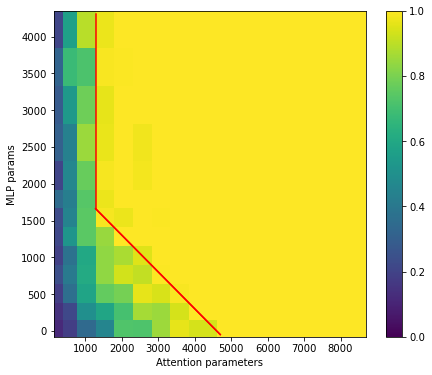

In [12]:
fig, ax = plt.subplots(figsize = (7, 6))
attn_params = d*dh*Hs
c = ax.pcolormesh(attn_params, d*ms, np.array(H_vs_m_results).T, cmap='viridis', vmin=0, vmax=1)
fig.colorbar(c, ax=ax)
plt.xlabel(r"Attention parameters")
plt.ylabel(r"MLP params")
plt.plot(range(1280, 4700), [2300 - a/2 for a in range(1280, 4700)], c = 'r')
plt.plot(range(1280, 4700), [2300 - a/2 for a in range(1280, 4700)], c = 'r')
plt.plot([1280, 1280], [1660, 4300], c = 'r', linestyle = 'solid')

plt.savefig("H_vs_m_standard.png", bbox_inches="tight")
